In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [319]:
spending = pd.read_csv('spending_2024.csv', delimiter=';')

In [320]:
spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         334 non-null    object 
 1   Description  334 non-null    object 
 2   Amount       301 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [321]:
spending.drop(spending.loc[spending['Description'].str.contains(r'PAY CIUSSS DE L\' EST DE MONTREAL', na=False)].index, inplace=True) # Need to ignore paycheck
spending = spending.dropna() # Remove rows with null values

In [322]:
spending.dropna(inplace=True) # Remove all the null values
print(spending.isna().sum()) # Checking if there is any lines with null values

Date           0
Description    0
Amount         0
dtype: int64


In [323]:
substring = 'RETAIL PURCHASE'
spending['Description'] = spending['Description'].apply(lambda line:line[line.find(substring):] if substring in line else line)

In [324]:
def remove_numeric(substring):
    if substring.isnumeric() and len(substring) == 12:
        return ''
    return substring

spending['Description'] = spending['Description'].apply(
    lambda line: " ".join(remove_numeric(word) for word in line.split())
)


In [325]:
spending.head(5)

,Date,Description,Amount
0,2024-06-28,RETAIL PURCHASE SH VENDING80036,1.85
1,2024-06-27,RETAIL PURCHASE SUPER C PTE AUX,28.19
2,2024-06-27,RETAIL PURCHASE SH VENDING80036,3.15
3,2024-06-26,RETAIL PURCHASE HOPITAL MAISONN,4.40
4,2024-06-25,Electronic Funds Transfer PREAUTHORIZED DEBIT ...,18.97


In [326]:
# Creating a dictionary to map category to a description
category_keywords = {
    "Groceries": ["SUPER C", "JEAN COUTU", "IGA", "METRO", "PHARMAPRIX", "MAXI", "DOLLARA", "DEPANNEUR"],
    "Health & Fitness": ["JUICE BAR", "NUTRITION", "KOALA", "CENTRE SPO", "SANTE",  "SAWA"],
    "Work Meals": ["HOPITAL", "VENDING"],
    "Savings": ["INVESTMENT", "MOKA"],
    "Restaurants & Takeout": ["CAFE", "MUFFIN", "RESTAURA", "UBER", "TIM", "CUP", "POULET", "SUSHI", "AMIR", "ALLEY", "CREMIE", "CULTURES", "BRULERIE", "GRILLAD", "CULTUR", "PORTION", "DOORDA", "K73", "TIAMO", "BO WOK", "TEA", "BERRI", "SENS", "TABAG", "DEP"],
    "Amazon": ["AMZN", "AMAZON"],
    "Entertainment": ["NETFLIX", "LIBRAIR", "AUDIBLE", "PUTTING ED"],
    "Essentials" : ["STM", "DEPANNEUR TRICE", "TELUS", "ECOLE DE", "FIDO", "UQAM", "UNIVERSITE",  "GOCARDLESS", "UDEMY", "KINDL", "QUIZL"],
    "Beauty" : ["GARAGE", "SEPHORA", "WINNERS", "SOURCIL", "UNICE", "A+", "INHAIRITANCE", "YESSTY", "WITHDR", "HMHE", "PAYPAL"],
    "Transfers & Withdrawals" : ["E-TRANSFER"]
}


In [335]:
def categorize_description(description):
    description = description.upper()
    for category, keywords in category_keywords.items():
        if any(keyword in description for keyword in keywords):
            return category
    print(description)
    return "Unknown"

spending["Category"] = spending["Description"].apply(categorize_description)

spending.head(10)


,Date,Description,Amount,Category
0,2024-06-28,RETAIL PURCHASE SH VENDING80036,1.85,Work Meals
1,2024-06-27,RETAIL PURCHASE SUPER C PTE AUX,28.19,Groceries
2,2024-06-27,RETAIL PURCHASE SH VENDING80036,3.15,Work Meals
3,2024-06-26,RETAIL PURCHASE HOPITAL MAISONN,4.40,Work Meals
4,2024-06-25,Electronic Funds Transfer PREAUTHORIZED DEBIT ...,18.97,Essentials
5,2024-06-25,RETAIL PURCHASE MUFFIN PLUS,6.67,Restaurants & Takeout
6,2024-06-25,RETAIL PURCHASE KOALAPRO PREMIU,14.89,Health & Fitness
7,2024-06-25,RETAIL PURCHASE HOPITAL MAISONN,5.70,Work Meals
8,2024-06-25,RETAIL PURCHASE HOPITAL MAISONN,1.80,Work Meals
9,2024-06-21,RETAIL PURCHASE TIM HORTONS #11,3.44,Restaurants & Takeout


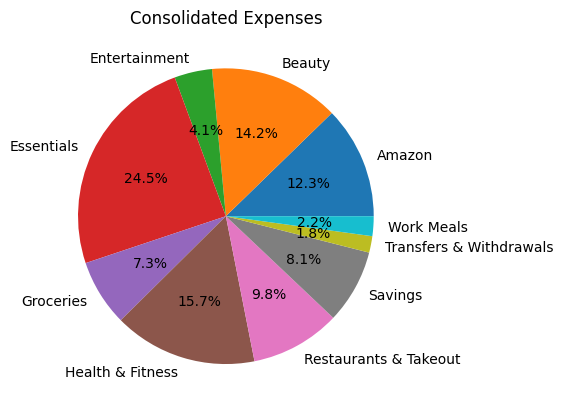

In [336]:
grouped_df = spending.groupby('Category', as_index=False)['Amount'].sum()
plt.pie(grouped_df['Amount'], labels=grouped_df['Category'], autopct='%1.1f%%')
plt.title('Consolidated Expenses')
plt.show()

